In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

In [ ]:
# Load Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)


# Get the shape of the first image in the training dataset
image, label = train_dataset[0]
print(image.shape)
print(len(train_dataset))


# Get the shape of the first image in the test dataset
image, label = test_dataset[0]
print(image.shape)
print(len(test_dataset))


# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

torch.Size([1, 28, 28])
60000
torch.Size([1, 28, 28])
10000


In [ ]:
class CNNClassifier(nn.Module):
    def __init__(self): # Changed _init_ to __init__
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
        self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1 = nn.Linear(128*3*3,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x=x.view(x.size(0), -1)
        x =torch.relu(self.fc1(x))
        x =torch.relu(self.fc2(x))
        return x

In [ ]:
# Initialize the Model, Loss Function, and Optimizer

model = CNNClassifier()
criterion =nn.CrossEntropyLoss()
optimizer =optim.Adam(model.parameters(),lr=0.01)

In [ ]:
# Train the Model
def train_model(model, train_loader, num_epochs=3):
  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0
      for images,labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()


        print('Name:MEENAKSHI.R')
        print('Register Number:212224220062')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
train_model(model, train_loader)


Streaming output truncated to the last 5000 lines.
Register Number:212224220062
Epoch [3/3], Loss: 0.0929
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0933
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0938
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0942
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0944
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0946
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0951
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0955
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0958
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0964
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0967
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0972
Name:MEENAKSHI.R
Register Number:212224220062
Epoch [3/3], Loss: 0.0976
Name:MEENAKSHI.R
Register Numb

In [ ]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print('Name:MEENAKSHI.R')
    print('Register Number:212224220062')
    print(f'Test Accuracy: {accuracy:.4f}')

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    print('Name:MEENAKSHI.R        ')
    print('Register Number:212224220062       ')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print('Name:MEENAKSHI.R        ')
    print('Register Number:212224220062       ')
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

Name:MEENAKSHI.R
Register Number:212224220062
Test Accuracy: 0.7549
Name:MEENAKSHI.R        
Register Number:212224220062       


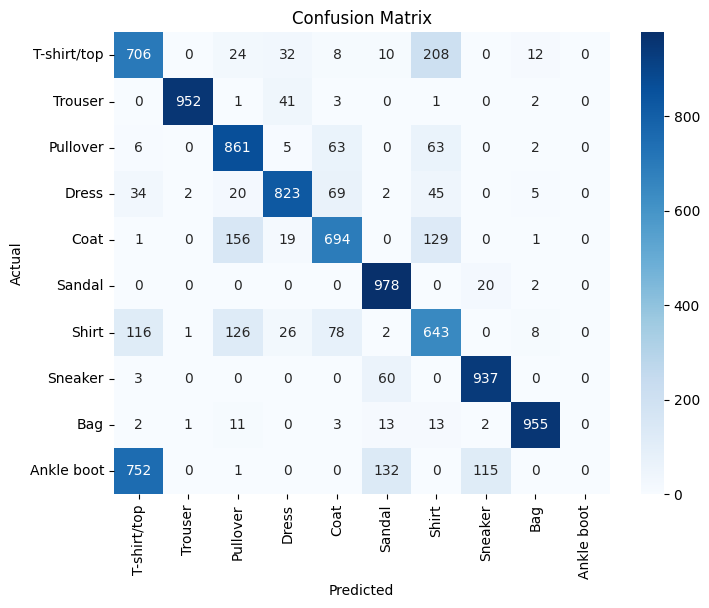

Name:MEENAKSHI.R        
Register Number:212224220062       
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.44      0.71      0.54      1000
     Trouser       1.00      0.95      0.97      1000
    Pullover       0.72      0.86      0.78      1000
       Dress       0.87      0.82      0.85      1000
        Coat       0.76      0.69      0.72      1000
      Sandal       0.82      0.98      0.89      1000
       Shirt       0.58      0.64      0.61      1000
     Sneaker       0.87      0.94      0.90      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.75     10000
   macro avg       0.70      0.75      0.72     10000
weighted avg       0.70      0.75      0.72     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
test_model(model, test_loader)

In [ ]:
import matplotlib.pyplot as plt
def predict_image(model, image_index, dataset):
    model.eval()
    image, label = dataset[image_index]
    with torch.no_grad():
        output = model(image.unsqueeze(0))  # Add batch dimension
        _, predicted = torch.max(output, 1)
    class_names = dataset.classes

    # Display the image
    print('Name: MEENAKSHI.R       ')
    print('Register Number: 212224220062      ')
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()
    print(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')

Name: MEENAKSHI.R       
Register Number: 212224220062      


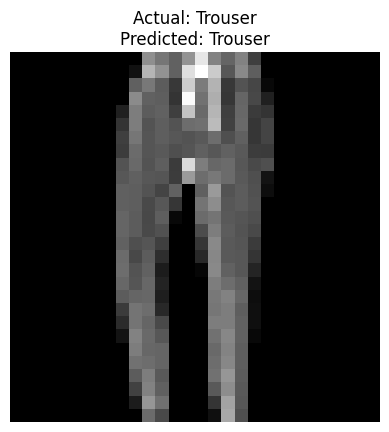

Actual: Trouser, Predicted: Trouser


In [ ]:
predict_image(model, image_index=80, dataset=test_dataset)